#BIBLIOTECAS

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
# Visualizando graficamente os pontos
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import plotly.express as px

In [ ]:
df = pd.read_csv('/content/train.csv')

In [ ]:
# Remover a coluna de sobreviventes
df.drop(columns=['Survived'], inplace=True)

In [ ]:
df.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0
Cabin,687


interpolação para preencher valores nulos com base nos valores adjacentes:

In [ ]:
df['Age'].interpolate(method='linear', inplace=True)
df.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0
Cabin,687


In [ ]:
# Preencher valores ausentes na coluna 'Fare' com a média da coluna
df["Fare"].fillna(df["Fare"].mean(), inplace=True)

# Converter valores categóricos da coluna 'Sex' para numéricos
df["Sex"] = df["Sex"].map({"male": 0, "female": 1})

# Converter valores categóricos da coluna 'Embarked' para numéricos
df["Embarked"] = df["Embarked"].map({"C": 0, "Q": 1, "S": 2})

# Preencher valores ausentes na coluna 'Cabin' com 0
df["Cabin"].fillna(0, inplace=True)

# Remover qualquer linha que ainda tenha valores ausentes
df.dropna(inplace=True)

# Reiniciar os índices do DataFrame após a remoção de linhas
df.reset_index(drop=True, inplace=True)

# Remover as colunas 'Name', 'Ticket', 'Cabin' e 'PassengerId' do DataFrame
df.drop(columns=["Name", "Ticket", "Cabin", "PassengerId"], inplace=True)

Normalização dos dados

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# Inicializa o MinMaxScaler
scaler = MinMaxScaler()

df_normalized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df_normalized.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1.0,0.0,0.271174,0.125,0.0,0.014151,1.0
1,0.0,1.0,0.472229,0.125,0.0,0.139136,0.0
2,1.0,1.0,0.321438,0.000,0.0,0.015469,1.0
3,0.0,1.0,0.434531,0.125,0.0,0.103644,1.0
4,1.0,0.0,0.434531,0.000,0.0,0.015713,1.0


#K-MEANS

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


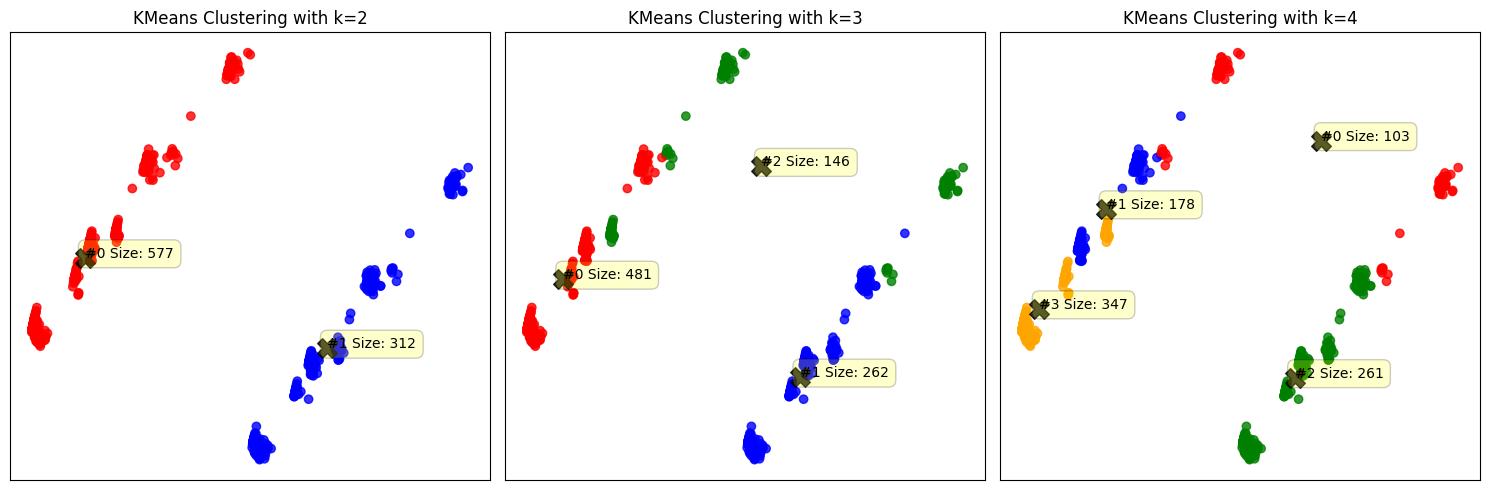

In [ ]:
k_values = [2, 3, 4]
k_colors = ['red', 'blue', 'green', 'orange', 'pink', 'purple', 'brown']

# Determine o número de linhas e colunas com base na quantidade de k_values
num_cols = min(len(k_values), 3)
num_rows = (len(k_values) + num_cols - 1) // num_cols

# Crie uma figura e um conjunto de subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
colors = np.array(k_colors)

for i, k in enumerate(k_values):
    row, col = divmod(i, num_cols)

    # Crie e ajuste o modelo KMeans
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_normalized)

    # Reduz a dimensionalidade com PCA
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(df_normalized.values)

    # Seleciona o subplot apropriado
    ax = axes[row, col] if num_rows > 1 else axes[col]

    # Plota os pontos de dados e os centros dos clusters
    ax.scatter(X_pca[:, 0], X_pca[:, 1], c=colors[kmeans.labels_], alpha=0.8)
    ax.scatter(pca.transform(kmeans.cluster_centers_)[:, 0], pca.transform(kmeans.cluster_centers_)[:, 1],
               c='black', s=200, alpha=0.8, marker='X')
    ax.set_title(f'KMeans Clustering with k={k}')
    ax.tick_params(axis='both', which='both', bottom=False, left=False, labelbottom=False, labelleft=False)

    # Tamanhos dos clusters
    cluster_sizes = [np.sum(kmeans.labels_ == j) for j in range(k)]

    # Anota tamanhos dos clusters
    for cluster_id, cluster_center in enumerate(pca.transform(kmeans.cluster_centers_)):
        ax.annotate(
            f'#{cluster_id} Size: {cluster_sizes[cluster_id]}',
            xy=(cluster_center[0], cluster_center[1]),
            xycoords='data',
            bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.2)
        )

# Esconde subplots vazios
for i in range(len(k_values), num_rows * num_cols):
    row, col = divmod(i, num_cols)
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()


Este trecho de código realiza clustering usando o algoritmo K-means para diferentes valores de
𝑘 e visualiza os resultados em uma figura com múltiplos subplots. Ele reduz a dimensionalidade dos dados usando PCA para plotar os pontos de dados e os centros dos clusters em um espaço bidimensional. Cada subplot mostra os clusters identificados para um valor específico de
𝑘, com as cores representando diferentes clusters e anotações indicando o tamanho de cada cluster. O objetivo é comparar visualmente os resultados do clustering para diferentes valores de
𝑘.

##Método do Elbow

In [ ]:
valores_k = []
square_dist = []

for i in range(1,20):
    kmeans = KMeans(n_clusters=i,random_state=0).fit(df_normalized)
    valores_k.append(i)
    square_dist.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

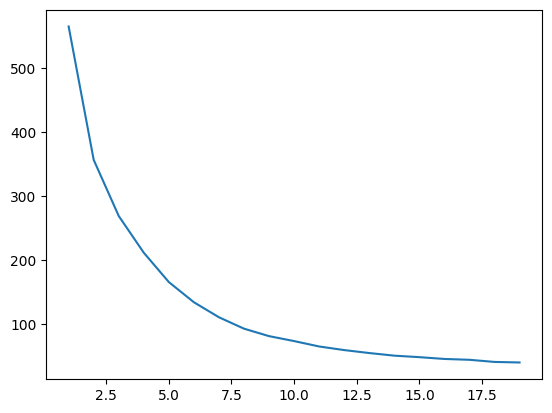

In [ ]:
# Visualizando a relação entre inércia e K
fig, ax = plt.subplots()

ax.plot(valores_k,square_dist)

plt.show()

O método do cotovelo (elbow) é aplicado no algoritmo de K-means para determinar o número ideal de clusters (
𝑘). Ele envolve executar o K-means para vários valores de
𝑘 e calcular a soma dos erros quadráticos (SSE) para cada
𝑘. Em seguida, os valores de SSE são plotados em um gráfico, e o ponto onde a diminuição do SSE começa a se estabilizar (formando um "cotovelo") indica o número ideal de clusters. Isso ajuda a escolher
𝑘 que balanceia a qualidade do clustering e a complexidade do modelo.

## Verificando o silhouette_score para:

O método silhouette score é utilizado para avaliar a qualidade do clustering no algoritmo K-means. Ele mede o quão bem cada ponto de dados está agrupado em relação aos outros pontos do mesmo cluster e aos pontos de clusters diferentes. O score varia de -1 a 1, onde valores próximos a 1 indicam que os pontos estão bem agrupados, valores próximos a 0 indicam sobreposição de clusters e valores negativos indicam que os pontos podem estar no cluster errado. Aplicar o silhouette score para diferentes valores de
𝑘 ajuda a determinar o número ideal de clusters, maximizando a separação e coesão dos clusters.

### K = 2

In [ ]:
kmeans_2 = KMeans(n_clusters=2,random_state=0).fit(df_normalized)
silhouette_score(df_normalized,kmeans_2.labels_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0.411963744003411

### K = 3

In [ ]:
kmeans_3 = KMeans(n_clusters=3,random_state=0).fit(df_normalized)
silhouette_score(df_normalized,kmeans_3.labels_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0.43894063906496444

##Verificando o Davies-Bouldin (DB) score para:

O método Davies-Bouldin é usado para avaliar a qualidade do clustering no algoritmo K-means. Ele calcula uma métrica baseada na média da similaridade entre cada cluster e o cluster mais similar a ele. A similaridade é uma medida de dispersão dentro do cluster e a distância entre os clusters. O índice Davies-Bouldin varia de 0 a ∞, onde valores mais baixos indicam clusters mais compactos e bem separados. Aplicar o índice Davies-Bouldin para diferentes valores de
𝑘 ajuda a determinar o número ideal de clusters, minimizando a similaridade entre clusters diferentes e maximizando a coesão dentro dos clusters.

### K = 2

In [ ]:
kmeans_2 = KMeans(n_clusters=2,random_state=0).fit(df_normalized)
davies_bouldin_score(df_normalized,kmeans_2.labels_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


1.1798884860474979

### K = 3

In [ ]:
kmeans_3 = KMeans(n_clusters=3,random_state=0).fit(df_normalized)
davies_bouldin_score(df_normalized,kmeans_3.labels_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


1.0926534064633713

##Verificando Calinski Harabasz score para:

O método Calinski-Harabasz, também conhecido como índice de variância, é utilizado para avaliar a qualidade do clustering no algoritmo K-means. Ele calcula a razão entre a soma da dispersão entre clusters e a soma da dispersão dentro dos clusters, considerando o número de clusters e o número de pontos de dados. Valores mais altos do índice indicam uma melhor separação entre os clusters e uma maior coesão dentro dos clusters. Aplicar o índice Calinski-Harabasz para diferentes valores de
𝑘 ajuda a determinar o número ideal de clusters, maximizando a separação entre clusters e a coesão dentro dos mesmos.

### K = 2

In [ ]:
kmeans_2 = KMeans(n_clusters=2,random_state=0).fit(df_normalized)
calinski_harabasz_score(df_normalized,kmeans_2.labels_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


518.4155784816812

### K = 3

In [ ]:
kmeans_3 = KMeans(n_clusters=3,random_state=0).fit(df_normalized)
calinski_harabasz_score(df_normalized,kmeans_3.labels_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


488.16929380513506

##Analisando graficamente:

###Silhouette score

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

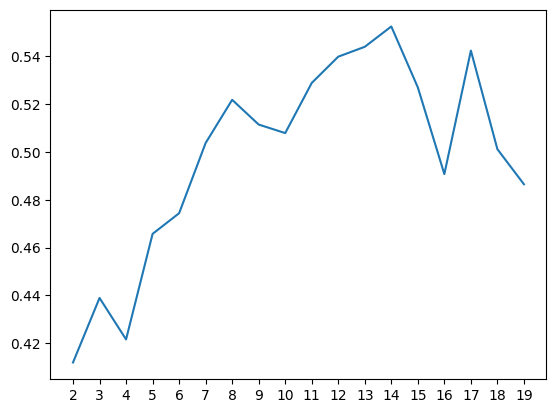

<Figure size 2000x1500 with 0 Axes>

In [ ]:
valores_k = []
s = []

for i in range(2,20): #Não aceita o valor 1
    kmeans = KMeans(n_clusters=i,random_state=0).fit(df_normalized)
    valores_k.append(i)
    s.append(silhouette_score(df_normalized,kmeans.labels_))

#visualizando graficamente
fig, ax = plt.subplots()

ax.plot(valores_k,s)
# Ajusta o localizador do eixo X para mostrar de 1 em 1
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.figure(figsize=(20, 15))
plt.show()

###Davies-Bouldin (DB)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will 

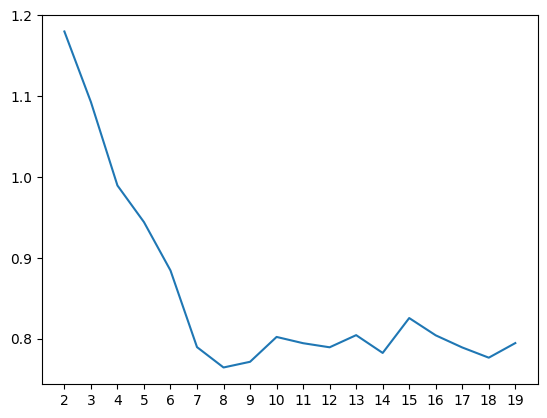

<Figure size 2000x1500 with 0 Axes>

In [ ]:
valores_k = []
s = []

for i in range(2,20): #Não aceita o valor 1
    kmeans = KMeans(n_clusters=i,random_state=0).fit(df_normalized)
    valores_k.append(i)
    s.append(davies_bouldin_score(df_normalized,kmeans.labels_))

#visualizando graficamente
fig, ax = plt.subplots()

ax.plot(valores_k,s)
# Ajusta o localizador do eixo X para mostrar de 1 em 1
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.figure(figsize=(20, 15))
plt.show()

### Calinski-Harabasz (CH) score

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will 

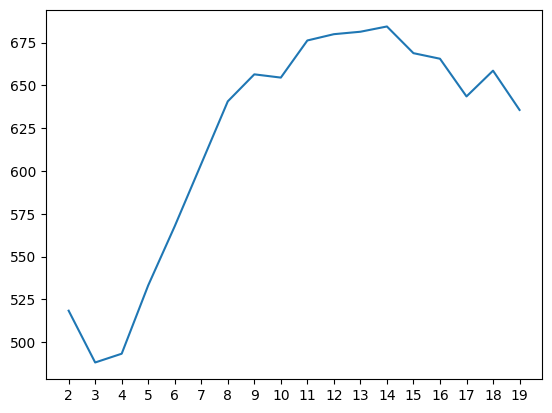

<Figure size 2000x1500 with 0 Axes>

In [ ]:
valores_k = []
s = []

for i in range(2,20): #Não aceita o valor 1
    kmeans = KMeans(n_clusters=i,random_state=0).fit(df_normalized)
    valores_k.append(i)
    s.append(calinski_harabasz_score(df_normalized,kmeans.labels_))

#visualizando graficamente
fig, ax = plt.subplots()

ax.plot(valores_k,s)
# Ajusta o localizador do eixo X para mostrar de 1 em 1
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.figure(figsize=(20, 15))
plt.show()

##Observações:

De acordo com a análise acima, o número ideal aproximado para K (clusters) seria de 5, pois é o valor onde tanto o método Calinski-Harabasz e Silhouette score tem um valor alto, quanto Davies-Bouldin e o método de Elbow tem um valor baixo. Sendo o cenário ideal

#DBSCAN

Número estimado de clusters: 34
Número estimado de pontos de ruído: 247


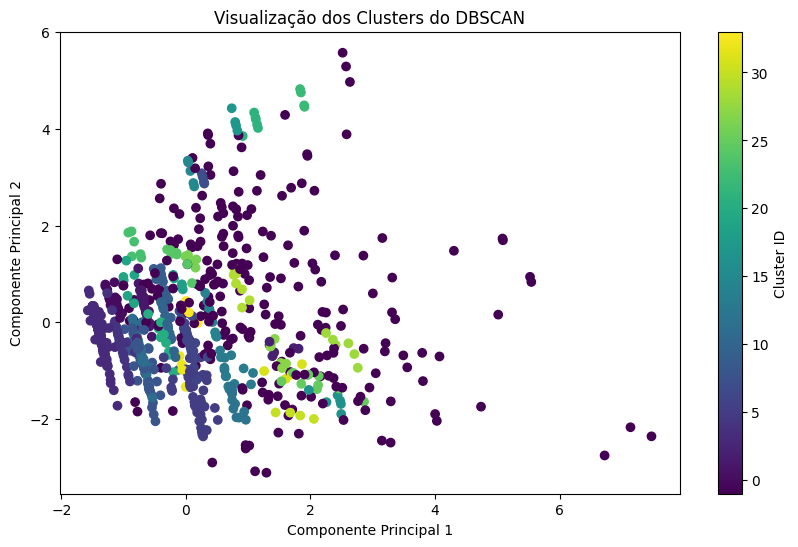

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

trainData_for_dbscan = df_normalized

scaler = StandardScaler()
trainData_scaled = scaler.fit_transform(trainData_for_dbscan)

eps_value = 0.8
min_samples_value = 4

dbscan = DBSCAN(eps=eps_value, min_samples=min_samples_value)
clusters = dbscan.fit_predict(trainData_scaled)

df['cluster'] = clusters

n_clusters_ = len(set(clusters)) - (1 if -1 in clusters else 0)
n_noise_ = list(clusters).count(-1)

print(f'Número estimado de clusters: {n_clusters_}')
print(f'Número estimado de pontos de ruído: {n_noise_}')

pca = PCA(n_components=2)
trainData_pca = pca.fit_transform(trainData_scaled)
plt.figure(figsize=(10, 6))
plt.scatter(trainData_pca[:, 0], trainData_pca[:, 1], c=clusters, cmap='viridis', marker='o')
plt.title('Visualização dos Clusters do DBSCAN')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(label='Cluster ID')
plt.show()


O método DBSCAN (Density-Based Spatial Clustering of Applications with Noise) é um algoritmo de clustering que identifica clusters de forma baseada na densidade dos dados. Ele funciona agrupando pontos que estão próximos uns dos outros, considerando uma distância mínima (𝜖) e um número mínimo de pontos (𝑚𝑖𝑛𝑃𝑡𝑠) para formar um cluster. Pontos em regiões de baixa densidade são considerados como ruído. DBSCAN é particularmente útil para descobrir clusters de forma arbitrária e é robusto a ruídos e outliers, sem necessidade de especificar previamente o número de clusters.

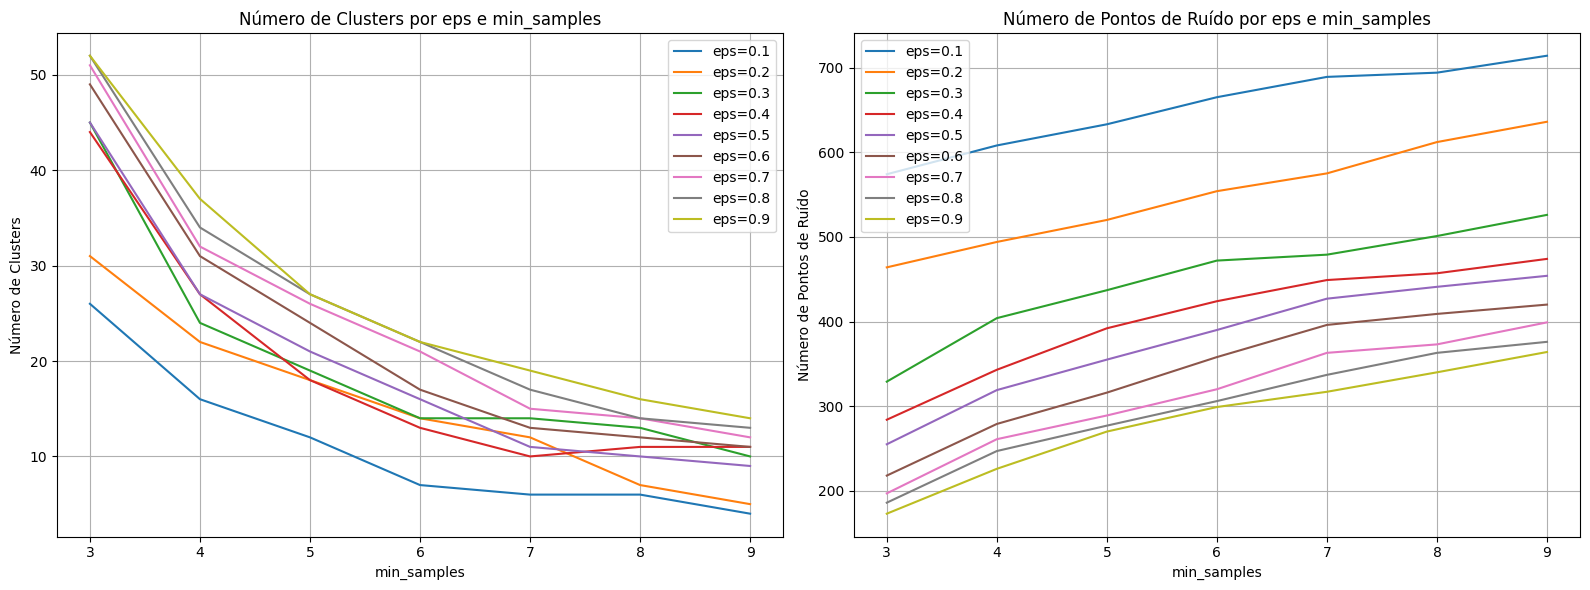

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

# Definir os intervalos de parâmetros para DBSCAN
eps_range = np.arange(0.1, 1.0, 0.1)
min_samples_range = range(3, 10)

# Listas para armazenar o número de clusters e pontos de ruído
clusters_list = []
noise_list = []

# Iterar sobre cada valor de eps no intervalo definido
for eps in eps_range:
    clusters_row = []  # Lista temporária para armazenar resultados de clusters para um valor específico de eps
    noise_row = []     # Lista temporária para armazenar resultados de ruído para um valor específico de eps
    for min_samples in min_samples_range:
        # Inicializar o modelo DBSCAN com os parâmetros atuais
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        # Ajustar o modelo aos dados e obter os rótulos dos clusters
        clusters = dbscan.fit_predict(trainData_scaled)
        # Calcular o número de clusters (excluindo ruído)
        n_clusters_ = len(set(clusters)) - (1 if -1 in clusters else 0)
        # Contar o número de pontos rotulados como ruído
        n_noise_ = list(clusters).count(-1)

        # Armazenar os resultados nas listas temporárias
        clusters_row.append(n_clusters_)
        noise_row.append(n_noise_)

    # Adicionar os resultados das listas temporárias às listas principais
    clusters_list.append(clusters_row)
    noise_list.append(noise_row)

# Converter as listas para arrays numpy para facilitar a manipulação dos dados
clusters_array = np.array(clusters_list)
noise_array = np.array(noise_list)

# Criar uma figura e subplots para visualizar os resultados
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Primeiro subplot: Número de clusters
ax1 = axes[0]
for i, eps in enumerate(eps_range):
    ax1.plot(min_samples_range, clusters_array[i, :], label=f'eps={eps:.1f}')
ax1.set_xlabel('min_samples')
ax1.set_ylabel('Número de Clusters')
ax1.set_title('Número de Clusters por eps e min_samples')
ax1.legend()
ax1.grid(True)

# Segundo subplot: Número de pontos de ruído
ax2 = axes[1]
for i, eps in enumerate(eps_range):
    ax2.plot(min_samples_range, noise_array[i, :], label=f'eps={eps:.1f}')
ax2.set_xlabel('min_samples')
ax2.set_ylabel('Número de Pontos de Ruído')
ax2.set_title('Número de Pontos de Ruído por eps e min_samples')
ax2.legend()
ax2.grid(True)

# Ajustar layout dos subplots para evitar sobreposição
plt.tight_layout()
plt.show()


realiza uma análise de sensibilidade dos parâmetros do algoritmo DBSCAN (𝜖 e 𝑚𝑖𝑛_𝑠𝑎𝑚𝑝𝑙𝑒𝑠) para determinar como eles impactam a formação de clusters e a identificação de ruídos. Para cada combinação de 𝜖 e 𝑚𝑖𝑛_𝑠𝑎𝑚𝑝𝑙𝑒𝑠, ele ajusta o modelo DBSCAN aos dados, calcula o número de clusters formados e a quantidade de pontos rotulados como ruído. Os resultados são visualizados em gráficos que mostram essas métricas em função de 𝑚𝑖𝑛_𝑠𝑎𝑚𝑝𝑙𝑒𝑠 para diferentes valores de
𝜖. Essa análise ajuda a escolher os melhores parâmetros para DBSCAN, otimizando a detecção de clusters relevantes e minimizando a quantidade de ruído, o que é crucial para obter resultados de clustering mais precisos e úteis

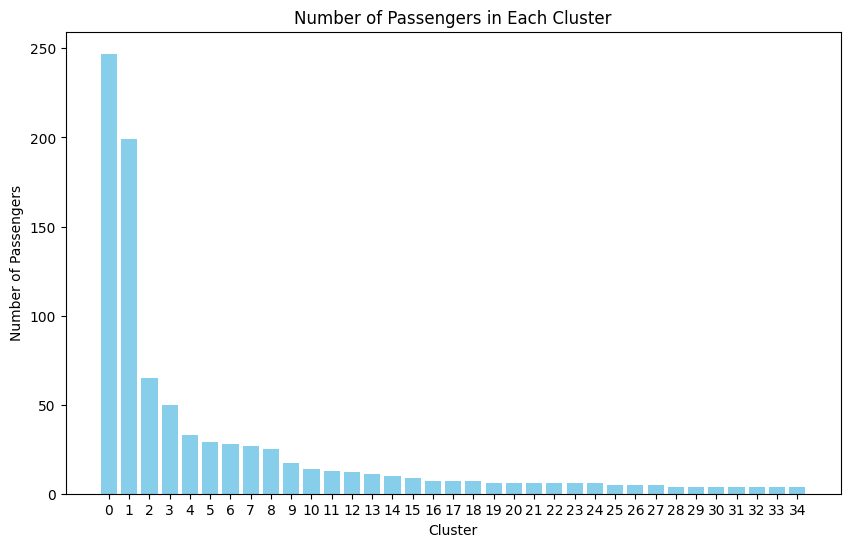

In [ ]:
cluster_counts = df['cluster'].value_counts()
cluster_numbers = range(0,len(cluster_counts))
# Plotting the bar plot
plt.figure(figsize=(10, 6))
plt.bar(cluster_numbers, cluster_counts.values, color='skyblue')
plt.xlabel('Cluster')
plt.ylabel('Number of Passengers')
plt.title('Number of Passengers in Each Cluster')
plt.xticks(cluster_numbers)
plt.show()

In [ ]:
cluster_summary = df.groupby('cluster').describe()
cluster_summary

Pclass                                                 Sex            \
         count      mean       std  min  25%  50%  75%  max  count      mean   
cluster                                                                        
-1       247.0  2.016194  0.887893  1.0  1.0  2.0  3.0  3.0  247.0  0.611336   
 0        17.0  3.000000  0.000000  3.0  3.0  3.0  3.0  3.0   17.0  0.000000   
 1        29.0  3.000000  0.000000  3.0  3.0  3.0  3.0  3.0   29.0  1.000000   
 2         7.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0    7.0  1.000000   
 3       199.0  3.000000  0.000000  3.0  3.0  3.0  3.0  3.0  199.0  0.000000   
 4        27.0  3.000000  0.000000  3.0  3.0  3.0  3.0  3.0   27.0  0.000000   
 5        50.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0   50.0  0.000000   
 6        28.0  2.000000  0.000000  2.0  2.0  2.0  2.0  2.0   28.0  1.000000   
 7         4.0  3.000000  0.000000  3.0  3.0  3.0  3.0  3.0    4.0  0.000000   
 8        65.0  2.000000  0.000000  2.0  2.0  2.0  2.0  2.0   65.0  0.000000   
 9        13.0  3.000000  0.000000  3.0  3.0  3.0  3.0  3.0   13.0  1.000000   
 10       25.0  3.000000  0.000000  3.0  3.0  3.0  3.0  3.0   25.0  1.000000   
 11       33.0  3.000000  0.000000  3.0  3.0  3.0  3.0  3.0   33.0  0.000000   
 12       12.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0   12.0  0.000000   
 13       14.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0   14.0  0.000000   
 14        9.0  2.000000  0.000000  2.0  2.0  2.0  2.0  2.0    9.0  1.000000   
 15        5.0  3.000000  0.000000  3.0  3.0  3.0  3.0  3.0    5.0  0.000000   
 16        6.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0    6.0  1.000000   
 17        4.0  3.000000  0.000000  3.0  3.0  3.0  3.0  3.0    4.0  0.000000   
 18        5.0  3.000000  0.000000  3.0  3.0  3.0  3.0  3.0    5.0  0.000000   
 19        6.0  3.000000  0.000000  3.0  3.0  3.0  3.0  3.0    6.0  0.000000   
 20       11.0  2.000000  0.000000  2.0  2.0  2.0  2.0  2.0   11.0  0.000000   
 21        6.0  3.000000  0.000000  3.0  3.0  3.0  3.0  3.0    6.0  1.000000   
 22        4.0  3.000000  0.000000  3.0  3.0  3.0  3.0  3.0    4.0  0.000000   
 23        6.0  3.000000  0.000000  3.0  3.0  3.0  3.0  3.0    6.0  0.000000   
 24        7.0  2.000000  0.000000  2.0  2.0  2.0  2.0  2.0    7.0  0.000000   
 25       10.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0   10.0  1.000000   
 26        5.0  3.000000  0.000000  3.0  3.0  3.0  3.0  3.0    5.0  1.000000   
 27        6.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0    6.0  1.000000   
 28        6.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0    6.0  1.000000   
 29        7.0  2.000000  0.000000  2.0  2.0  2.0  2.0  2.0    7.0  1.000000   
 30        4.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0    4.0  0.000000   
 31        4.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0    4.0  0.000000   
 32        4.0  2.000000  0.000000  2.0  2.0  2.0  2.0  2.0    4.0  0.000000   
 33        4.0  3.000000  0.000000  3.0  3.0  3.0  3.0  3.0    4.0  1.000000   

         ...        Fare           Embarked                                \
         ...         75%       max    count      mean       std  min  25%   
cluster  ...                                                                
-1       ...   77.008350  512.3292    247.0  1.251012  0.933647  0.0  0.0   
 0       ...   16.100000   19.9667     17.0  2.000000  0.000000  2.0  2.0   
 1       ...    8.683300   12.4750     29.0  2.000000  0.000000  2.0  2.0   
 2       ...   69.687500   90.0000      7.0  2.000000  0.000000  2.0  2.0   
 3       ...    8.050000   56.4958    199.0  2.000000  0.000000  2.0  2.0   
 4       ...    7.750000   24.1500     27.0  1.000000  0.000000  1.0  1.0   
 5       ...   33.890600   52.0000     50.0  2.000000  0.000000  2.0  2.0   
 6       ...   13.000000   33.0000     28.0  2.000000  0.000000  2.0  2.0   
 7       ...   29.125000   29.1250      4.0  1.000000  0.000000  1.0  1.0   
 8       ...   13.000000   26.0000     65.0